In [1]:
# enable printing of more than one attribute from a single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

![pandas logo](img/pandas_logo_600x125.png)

# A gentle introduction to pandas

[Klaus-Dieter Warzecha](https://github.com/klauswarzecha)



## What is pandas?

> ### Python Data Analysis Library

> pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

## The major objects in pandas

<div class="alert alert-success" role="alert">

<strong>Lesson 0</strong>

<ol>
<li><strong>DataFrame</strong> is a <em>2-dimensional</em> labeled data structure with columns of potentially different types. [&hellip;]<br> It is generally the most commonly used pandas object.</li>

<li><strong>Series</strong> is a <em>one-dimensional</em> labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.).</li>
</ol>
</div>
[source](http://pandas.pydata.org/pandas-docs/version/0.20/dsintro.html)

# How to use pandas

In [2]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style
style.use('ggplot')
%matplotlib inline

## A DataFrame for a Hall of Fame

In [4]:
data = [
    ['Kurt', 'Alder', '10.07.1902', '20.06.1958', 1950], 
    ['Gerhard Ludwig', 'Ertl', '10.10.1936', '', 2007], 
    ['Emil', 'Fischer', '09.10.1852', '15.07.1919', 1902], 
    ['Ronald George Wreyford', 'Norrish', '09.11.1897', '07.06.1978', 1967],
    ['Georg', 'Wittig', '16.07.1897', '26.08.1987',  1979],
    ['Ernest', 'Rutherford', '30.08.1871', '19.10.1937', 1908],
    ['Marie', 'Curie', '07.11.1867', '04.07.1934', 1911], 
    ['Manfred', 'Eigen', '09.05.1927', '', 1967],
    ['Victor', 'Grignard', '06.05.1871', '13.12.1935', 1912],
    ['Richard', 'Willstätter', '13.08.1872', '03.08.1942', 1915], 
    ['Hans', 'Fischer', '27.07.1881', '31.03.1945', 1930],
    ['Otto', 'Diels', '23.01.1876', '07.03.1954', 1950],
    ['Jean-Marie', 'Lehn', '30.09.1939', '', 1987],
    ['Harold', 'Kroto', '07.10.1939', '30.04.2016', 1996], 
    ['Rudolph Arthur', 'Marcus', '21.07.1923','', 1992],
    ['George', 'Porter', '06.12.1920','31.08.2002', 1967]
]

dims = (len(data), len(data[-1]))
dims

df = pd.DataFrame(data)
type(df)

(16, 5)

pandas.core.frame.DataFrame

### DataFrames have attributes

In [5]:
df.shape
df.columns
df.index

(16, 5)

RangeIndex(start=0, stop=5, step=1)

RangeIndex(start=0, stop=16, step=1)

<div class="alert alert-success" role="alert">

<strong>Lesson 1</strong>

<ol>
<li>A DataFrame is organized in rows and columns.</li>

<ul>
    <li>Each row represents an observation.</li>
    <li>Each column represents a variable.</li>
</ul>

<li>A DataFrame has an <strong>index</strong> (row labels) 
and <strong>column headers</strong>.</li>
<li><strong>Index</strong> (row labels) and <strong>column headers</strong> and not part of the DataFrame content.</li>
</ol>
</div>

In [6]:
df.head() # display the top n (default: n=5) rows in a DataFrame

,0,1,2,3,4
0,Kurt,Alder,10.07.1902,20.06.1958,1950
1,Gerhard Ludwig,Ertl,10.10.1936,,2007
2,Emil,Fischer,09.10.1852,15.07.1919,1902
3,Ronald George Wreyford,Norrish,09.11.1897,07.06.1978,1967
4,Georg,Wittig,16.07.1897,26.08.1987,1979


In [7]:
df.columns = ['firstname', 'lastname', 'date of birth', 'deathdate', 'received']
df.head()

,firstname,lastname,date of birth,deathdate,received
0,Kurt,Alder,10.07.1902,20.06.1958,1950
1,Gerhard Ludwig,Ertl,10.10.1936,,2007
2,Emil,Fischer,09.10.1852,15.07.1919,1902
3,Ronald George Wreyford,Norrish,09.11.1897,07.06.1978,1967
4,Georg,Wittig,16.07.1897,26.08.1987,1979


In [8]:
df['date of birth'] # bracket notation, reminds in a dict
type(df['date of birth'])

0     10.07.1902
1     10.10.1936
2     09.10.1852
3     09.11.1897
4     16.07.1897
5     30.08.1871
6     07.11.1867
7     09.05.1927
8     06.05.1871
9     13.08.1872
10    27.07.1881
11    23.01.1876
12    30.09.1939
13    07.10.1939
14    21.07.1923
15    06.12.1920
Name: date of birth, dtype: object

pandas.core.series.Series

<div class="alert alert-success" role="alert">

<strong>Lesson 2</strong>

<p>A DataFrame column is a <strong>Series</strong> and has an <strong>index</strong>.<p>
</div>

In [9]:
df.deathdate # dot notation, reminds in a class

0     20.06.1958
1               
2     15.07.1919
3     07.06.1978
4     26.08.1987
5     19.10.1937
6     04.07.1934
7               
8     13.12.1935
9     03.08.1942
10    31.03.1945
11    07.03.1954
12              
13    30.04.2016
14              
15    31.08.2002
Name: deathdate, dtype: object

<div class="alert alert-success" role="alert">

<strong>Lesson 3</strong>

<p>A column name without spaces can be used as an attribute!<p>
</div>

In [10]:
df.rename(columns = {'date of birth': 'birthdate'}, inplace=True)
df.birthdate.head(2)

0    10.07.1902
1    10.10.1936
Name: birthdate, dtype: object

<div class="alert alert-success" role="alert">

<strong>Lesson 4</strong>
<p>Each column in a DataFrame has a <strong>dtype</strong>.</p>
</div>


In [11]:
df.dtypes

firstname    object
lastname     object
birthdate    object
deathdate    object
received      int64
dtype: object

Here, `object` means `str`.

<div class="alert alert-warning" role="alert">
<p>Day of birth and day of death as strings? Really? These are <strong>dates</strong>!</p>
</div>


In [12]:
df.birthdate = pd.to_datetime(df.birthdate, format='%d.%m.%Y')
df.deathdate = pd.to_datetime(df.deathdate)

<div class="alert alert-success" role="alert">

<strong>Lesson 5</strong>
<p>Use datetime for dates. <strong>ISO 8601</strong> rocks.</p>
</div>

In [13]:
df.tail()
df.dtypes

,firstname,lastname,birthdate,deathdate,received
11,Otto,Diels,1876-01-23,1954-07-03,1950
12,Jean-Marie,Lehn,1939-09-30,NaT,1987
13,Harold,Kroto,1939-10-07,2016-04-30,1996
14,Rudolph Arthur,Marcus,1923-07-21,NaT,1992
15,George,Porter,1920-12-06,2002-08-31,1967


firstname            object
lastname             object
birthdate    datetime64[ns]
deathdate    datetime64[ns]
received              int64
dtype: object

> `Series.dt` can be used to access the values of the series as datetimelike and return several properties. 

> These can be accessed like `Series.dt.<property>`.

[source](https://pandas.pydata.org/pandas-docs/stable/api.html#datetimelike-properties)

In [14]:
laureates = df.copy()

laureates['age'] = laureates.received - laureates.birthdate.dt.year
laureates.set_index(laureates.received, inplace=True)
laureates.sort_index(inplace=True)
laureates

,firstname,lastname,birthdate,deathdate,received,age
received,,,,,,
1902,Emil,Fischer,1852-10-09,1919-07-15,1902,50
1908,Ernest,Rutherford,1871-08-30,1937-10-19,1908,37
1911,Marie,Curie,1867-11-07,1934-04-07,1911,44
1912,Victor,Grignard,1871-05-06,1935-12-13,1912,41
1915,Richard,Willstätter,1872-08-13,1942-03-08,1915,43
1930,Hans,Fischer,1881-07-27,1945-03-31,1930,49
1950,Kurt,Alder,1902-07-10,1958-06-20,1950,48
1950,Otto,Diels,1876-01-23,1954-07-03,1950,74
1967,Ronald George Wreyford,Norrish,1897-11-09,1978-07-06,1967,70


----

## Read data from a CSV file

```python
pandas.read_csv(filepath_or_buffer, 
                sep=’, ’, delimiter=None, header=’infer’, names=None, index_col=None, usecols=None, 
                squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None,
                true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None,
                na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True,
                parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None,
                dayfirst=False, iterator=False, chunksize=None, compression=’infer’, thousands=None, 
                decimal=b’.’, lineterminator=None, quotechar=’”’, quoting=0, escapechar=None, comment=None,
                encoding=None, dialect=None, tupleize_cols=False, error_bad_lines=True, warn_bad_lines=True,
                skipfooter=0, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=False,
                compact_ints=False, use_unsigned=False, low_memory=True, buffer_lines=None, 
                memory_map=False, float_precision=None)``` 
                
[source](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

<div class="alert alert-info">
   <strong>NOTE</strong> All parameters except for the first have default values. Skip them, unless you need to override them.
</div>

----

### Side note I

  - `data/sp500/sp500shares.csv` contains a list of all S&P500 companies
  - `callsign`, e.g. `NYSE:MRK` is needed to retrieve share prices from Google Finance using the `pandas-datareader`
  
### Side note II 

As a highly recommendable alternative, use [Quandl](https://www.quandl.com)!

  - Create a free account at [Quandl](https://www.quandl.com)
  - Install the `quandl` package for Python (`conda install quandl`)
  - `df = quandl.get(...)`



In [49]:
# CSX Corporation (Railroad & transportation)
csx = pd.read_csv('data/sp500/CSX.csv', 
                  index_col='Date', 
                  parse_dates=['Date'])

In [16]:
csx.head()
csx.shape

,Open,High,Low,Close,Volume
Date,,,,,
2016-01-04,46.94,47.72,46.75,47.27,2866067
2016-01-05,47.51,48.10,47.28,48.01,3117022
2016-01-06,47.27,48.35,47.26,48.02,4670537
2016-01-07,46.99,48.00,46.29,46.56,4324437
2016-01-08,46.94,47.57,45.65,45.88,4946099


(372, 5)

## Accessing rows

### based on position

Let's access the 0-th row

call | result |
-----:|:----------
`csx[0]`            | KeyError
`csx['2016-01-04']` | KeyError
`csx[2016-01-04]`   | SyntaxError


<div class="alert alert-success" role="alert">

<strong>Lesson 6</strong>
<p>Use <strong>iloc</strong> to adress rows (and columns) based integer position.</p>
</div>

In [17]:
# df.iloc[row, column]
csx.iloc[0, :]

Open           46.94
High           47.72
Low            46.75
Close          47.27
Volume    2866067.00
Name: 2016-01-04 00:00:00, dtype: float64

### based on label

In [18]:
csx.loc['2016-01-04':'2016-01-11':2].Close

Date
2016-01-04    47.27
2016-01-06    48.02
2016-01-08    45.88
Name: Close, dtype: float64

<div class="alert alert-success" role="alert">

<strong>Lesson 7</strong>
<p>Use <strong>loc</strong> to adress rows based on label.</p>
</div>

### based on logical conditions

In [19]:
(csx.Close > 60).any() # are there any closing prices > 55 USD

True

In [20]:
(csx.Close > 60).head() # boolean Series
csx[csx.Close > 60].head()

Date
2016-01-04    False
2016-01-05    False
2016-01-06    False
2016-01-07    False
2016-01-08    False
Name: Close, dtype: bool

,Open,High,Low,Close,Volume
Date,,,,,
2017-05-16,60.24,60.38,59.90,60.33,1816297
2017-05-19,59.98,60.61,59.94,60.31,2567745
2017-05-22,60.39,60.88,60.28,60.31,3117309
2017-05-23,60.50,61.46,60.50,61.43,3330549
2017-05-24,61.43,62.48,61.39,62.30,3869148


In [21]:
csx[(csx.Close < 40) & (csx.Volume > 5E6)]

,Open,High,Low,Close,Volume
Date,,,,,
2016-02-09,39.58,40.96,39.39,39.86,5912477
2016-02-10,40.17,40.48,39.25,39.33,6594423
2016-02-11,38.98,39.53,38.26,39.36,8041650
2016-03-10,39.92,40.61,39.35,39.91,7999495
2016-03-17,40.49,40.67,39.52,39.72,7227055


<div class="alert alert-success" role="alert">

<strong>Lesson 8</strong>
<p>Boolean masks for the selection of data can be combined.</p>
</div>

## Resampling

In [22]:
weekly = csx.Close.resample('W-SUN').mean()
weekly.size

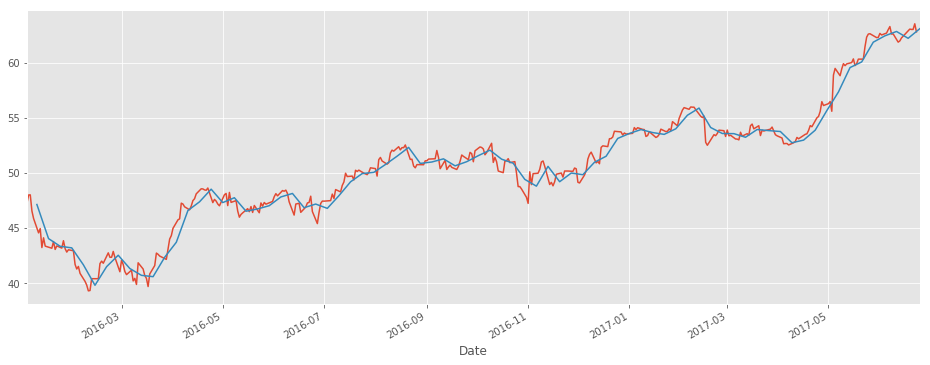

In [24]:
csx.Close.plot(figsize=(16,6))
weekly.plot(figsize=(16,6));

----

# BONUS - Messy UFO data

In [25]:
!wc -l data/ufos-1905-1989.csv
!head -n10 data/ufos-1905-1989.csv

7650 data/ufos-1905-1989.csv
# UFO sightings reported to the National UFO Reporting Center 
# http://www.nuforc.org/webreports
# date range: 1905-01-01 to 1989-12-31
# NOTE: Data is largely unsanitized!
#
dtime,city,state,ufoshape
1989-12-31 23:00:00,Ocala,FL,Triangle
1989-12-25 23:00:00,Santiago (Chile),,Light
1989-12-24 23:45:00,Orrington,ME,Triangle
1989-12-24 01:00:00,Santiago (Chile),,Light


In [26]:
ufos = pd.read_csv('data/ufos-1905-1989.csv', 
                   comment ='#', parse_dates=[0])
ufos.head(4)

,dtime,city,state,ufoshape
0,1989-12-31 23:00:00,Ocala,FL,Triangle
1,1989-12-25 23:00:00,Santiago (Chile),NaN,Light
2,1989-12-24 23:45:00,Orrington,ME,Triangle
3,1989-12-24 01:00:00,Santiago (Chile),NaN,Light


##  Concatenate multiple CSV files into a single DataFrame

```python
pd.concat(objs, axis=0, join='outer', join_axes=None, 
          ignore_index=False, keys=None, levels=None, 
          names=None, verify_integrity=False, copy=True)
```
[source](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html)

In [27]:
import glob

# collect the file names in a list
fnames = glob.glob('data/ufos*.csv')

# generator expression to read the CSV files - one by one
# ignore lines that start with '#'
# let pandas firgure out the datetime format in column zero
dfs = (pd.read_csv(fname, comment ='#', parse_dates=[0]) for fname in fnames)

# concatenate them to a single DataFame
ufos = pd.concat(dfs)

In [28]:
ufos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110743 entries, 0 to 5568
Data columns (total 4 columns):
dtime       110743 non-null datetime64[ns]
city        110525 non-null object
state       102462 non-null object
ufoshape    107276 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 4.2+ MB


## How many sightings per year?

```python
Series.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)
```
Returns object containing counts of unique values.

The resulting object will be in descending order so that the first element is the most frequently-occurring element. Excludes NA values by default.

In [30]:
ufos.dtime.dt.year.value_counts().head(4)

2014    8632
2012    8075
2013    7773
2015    6852
Name: dtime, dtype: int64

In [31]:
sightings = ufos.dtime.dt.year.value_counts()
sightings.sort_index(ascending=True, inplace=True)
sightings.head()

1905    2
1906    1
1910    3
1914    1
1916    1
Name: dtime, dtype: int64

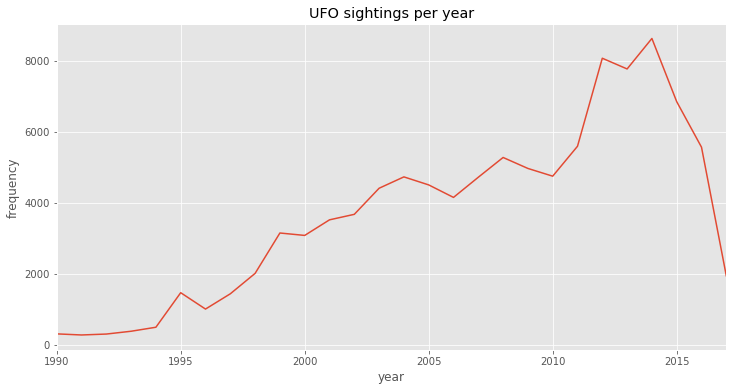

In [54]:
ax = sightings.loc[1990:].plot(figsize=(12,6), title='UFO sightings per year')
plt.xlabel('year')
plt.ylabel('frequency');

----

## Sightings by US state

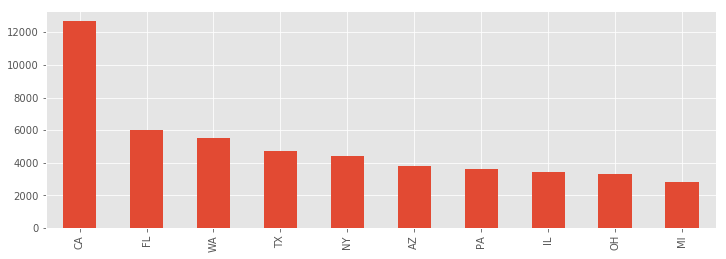

In [60]:
ufos.state.value_counts().head(10).plot(kind='bar', figsize = (12,4));

----

## Missing values

<div class="alert alert-info" role="alert">
<p><strong>NOTE</strong> Missing values happen all the time.</p>
</div>

<div class="alert alert-warning" role="alert">
<p>Missing values coded as <code>-999, Other, Unknown, NotSeen</code> are a bad idea</p>
</div>

<div class="alert alert-success" role="alert">
<strong>Lesson 9</strong>    

<p><strong>NaN</strong> (<em>not a number</em>) and <strong>NaT</strong> (<em>not a timestamp</em>) indicate missing or unknown values.</p>

<p>Use <code>isnull()</code> to detect missing values. There is also <code>notnull()</code>!</p>

</div>

In [33]:
ufos[ufos.ufoshape.isnull()].shape

(3467, 4)

In [34]:
ufos[ufos.ufoshape.isin(['Unknown', 'unknown', 'Other', 'other'])].shape

(15427, 4)

### How to sanitize?

  - Achieve consistent writing (uppercase, lowercase, capitalized)

In [35]:
ufos.ufoshape.value_counts()

Light         22449
Circle        11327
Triangle      10387
Fireball       8569
Unknown        7791
Other          7617
Sphere         7267
Disk           6919
Oval           4957
Formation      3420
Changing       2668
Cigar          2638
Flash          1920
Rectangle      1822
Cylinder       1692
Diamond        1622
Chevron        1280
Teardrop       1001
Egg             987
Cone            458
Cross           336
light            58
triangle         18
other            18
circle            8
Delta             7
sphere            7
cylinder          5
rectangle         4
cigar             3
diamond           2
fireball          2
Round             2
oval              2
Crescent          2
TRIANGULAR        1
delta             1
changing          1
Hexagon           1
flash             1
unknown           1
changed           1
egg               1
Dome              1
Flare             1
pyramid           1
Name: ufoshape, dtype: int64

In [36]:
ufos.ufoshape = ufos.ufoshape.str.upper()

In [37]:
ufos.ufoshape

0       FORMATION
1          CIRCLE
2           LIGHT
3         UNKNOWN
4            DISK
5          SPHERE
6       FORMATION
7        FIREBALL
8           LIGHT
9        TRIANGLE
10         SPHERE
11       TRIANGLE
12          LIGHT
13       FIREBALL
14          OTHER
15         CIRCLE
16          LIGHT
17          LIGHT
18           OVAL
19          LIGHT
20        UNKNOWN
21          OTHER
22         SPHERE
23           OVAL
24          LIGHT
25           DISK
26      FORMATION
27          OTHER
28           DISK
29          LIGHT
          ...    
5539        LIGHT
5540       CIRCLE
5541     FIREBALL
5542     TRIANGLE
5543        OTHER
5544    FORMATION
5545        LIGHT
5546     FIREBALL
5547       CIRCLE
5548     FIREBALL
5549        OTHER
5550        LIGHT
5551      DIAMOND
5552         OVAL
5553         DISK
5554        LIGHT
5555        LIGHT
5556     TRIANGLE
5557       SPHERE
5558       CIRCLE
5559        LIGHT
5560       SPHERE
5561        LIGHT
5562        LIGHT
5563      

In [38]:
ufos.ufoshape.value_counts()

LIGHT         22507
CIRCLE        11335
TRIANGLE      10405
FIREBALL       8571
UNKNOWN        7792
OTHER          7635
SPHERE         7274
DISK           6919
OVAL           4959
FORMATION      3420
CHANGING       2669
CIGAR          2641
FLASH          1921
RECTANGLE      1826
CYLINDER       1697
DIAMOND        1624
CHEVRON        1280
TEARDROP       1001
EGG             988
CONE            458
CROSS           336
DELTA             8
ROUND             2
CRESCENT          2
CHANGED           1
PYRAMID           1
HEXAGON           1
DOME              1
TRIANGULAR        1
FLARE             1
Name: ufoshape, dtype: int64

In [39]:
print(ufos.ufoshape.sort_values().unique())

['CHANGED' 'CHANGING' 'CHEVRON' 'CIGAR' 'CIRCLE' 'CONE' 'CRESCENT' 'CROSS'
 'CYLINDER' 'DELTA' 'DIAMOND' 'DISK' 'DOME' 'EGG' 'FIREBALL' 'FLARE'
 'FLASH' 'FORMATION' 'HEXAGON' 'LIGHT' 'OTHER' 'OVAL' 'PYRAMID' 'RECTANGLE'
 'ROUND' 'SPHERE' 'TEARDROP' 'TRIANGLE' 'TRIANGULAR' 'UNKNOWN' nan]


  - Unify shape descriptions (`CHANGE`, `CHANGING`, `TRIANGLE`, `TRIANGULAR`)
  - Replace `UNKNOWN, OTHER` with `NaN`

In [40]:
import numpy as np
ufos.loc[ufos.ufoshape.isin(['OTHER', 'UNKNOWN']), 'ufoshape'] = np.nan

In [41]:
ufos.ufoshape.value_counts()

LIGHT         22507
CIRCLE        11335
TRIANGLE      10405
FIREBALL       8571
SPHERE         7274
DISK           6919
OVAL           4959
FORMATION      3420
CHANGING       2669
CIGAR          2641
FLASH          1921
RECTANGLE      1826
CYLINDER       1697
DIAMOND        1624
CHEVRON        1280
TEARDROP       1001
EGG             988
CONE            458
CROSS           336
DELTA             8
CRESCENT          2
ROUND             2
HEXAGON           1
PYRAMID           1
DOME              1
TRIANGULAR        1
CHANGED           1
FLARE             1
Name: ufoshape, dtype: int64

## String-heavy DataFrames

In [42]:
ufos.memory_usage(deep=True)

Index       3507384
dtime        885944
city        7545999
state       6310250
ufoshape    6403380
dtype: int64

In [43]:
ufos.ufoshape = ufos.ufoshape.astype('category')

In [44]:
ufos.memory_usage(deep=True)

Index       3507384
dtime        885944
city        7545999
state       6310250
ufoshape     113796
dtype: int64

<div class="alert alert-success" role="alert">
<strong>Lesson 10</strong>    

<p>Convert recurring strings in a Series (column of a DataFrame) into <strong>categories</strong> 
to decrease the memory footprint!</p>
</div>

In [45]:
ufos.dtypes

dtime       datetime64[ns]
city                object
state               object
ufoshape          category
dtype: object

In [46]:
ufos.ufoshape.cat.categories

Index(['CHANGED', 'CHANGING', 'CHEVRON', 'CIGAR', 'CIRCLE', 'CONE', 'CRESCENT',
       'CROSS', 'CYLINDER', 'DELTA', 'DIAMOND', 'DISK', 'DOME', 'EGG',
       'FIREBALL', 'FLARE', 'FLASH', 'FORMATION', 'HEXAGON', 'LIGHT', 'OVAL',
       'PYRAMID', 'RECTANGLE', 'ROUND', 'SPHERE', 'TEARDROP', 'TRIANGLE',
       'TRIANGULAR'],
      dtype='object')

----

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work by <a xmlns:cc="http://creativecommons.org/ns#" href="https://github.com/klauswarzecha/pandas-ruhrpy" property="cc:attributionName" rel="cc:attributionURL">Klaus-Dieter Warzecha</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.